In [2]:
!pip install squarify
!pip install streamlit
import os   #For operating system related functionalities
from collections import defaultdict #For creating a dictionary with a default value
import streamlit as st
import zipfile
import pandas as pd
import re
import numpy as np
import string
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
zip_file_path = r'/content/R.zip'
#raw string literals, which is used to prevent any escape character interpretation.
extract_path = r'/content/Resumes-Extracted'

# Extract the ZIP file to the specified extract path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=a17a0d11f66be370e426fc1c8749dba1883ef505cbf19587b638d5e65e6bbf5d
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [3]:
# Dictionary to store the count of file extensions
file_extension_count = defaultdict(int)

# Iterate over the files in the extracted directory
for root, dirs, files in os.walk(extract_path):
    for file in files:
        file_extension = os.path.splitext(file)[1]
        file_extension_count[file_extension] += 1

# Print the count of each file extension
for extension, count in file_extension_count.items():
    print(f"File extension: {extension}, Count: {count}")

# Calculate the total count of file extensions
total_count = sum(file_extension_count.values())

# Print the total count
print("Total count:", total_count)

File extension: .docx, Count: 52
File extension: .doc, Count: 26
File extension: .pdf, Count: 1
Total count: 79


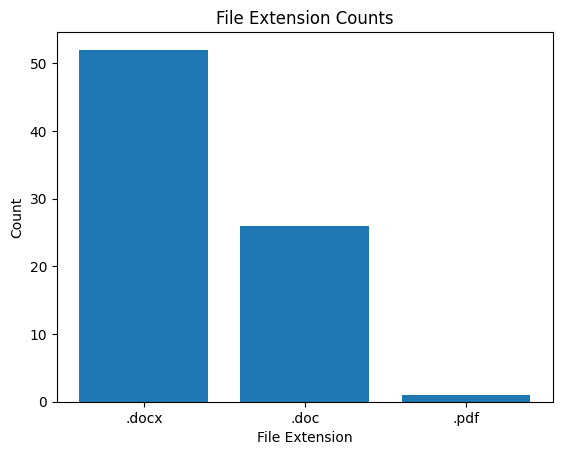

In [4]:
import matplotlib.pyplot as plt

# Get the file extensions and their corresponding counts
extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]

# Plotting the bar plot
plt.bar(extensions, counts)
plt.xlabel('File Extension')
plt.ylabel('Count')

plt.title('File Extension Counts')
plt.show()

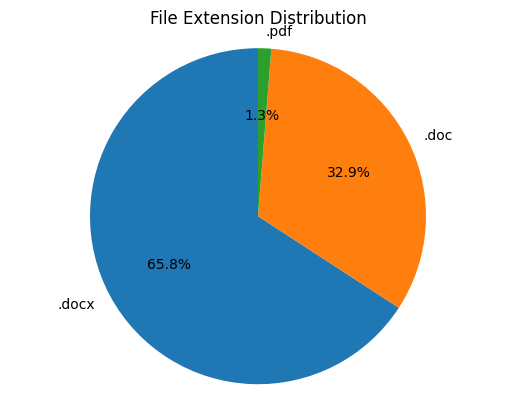

In [5]:
import matplotlib.pyplot as plt

# Get the file extensions and their corresponding counts
extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]

# Define labels for the pie chart
labels = extensions

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the title of the pie chart
plt.title('File Extension Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

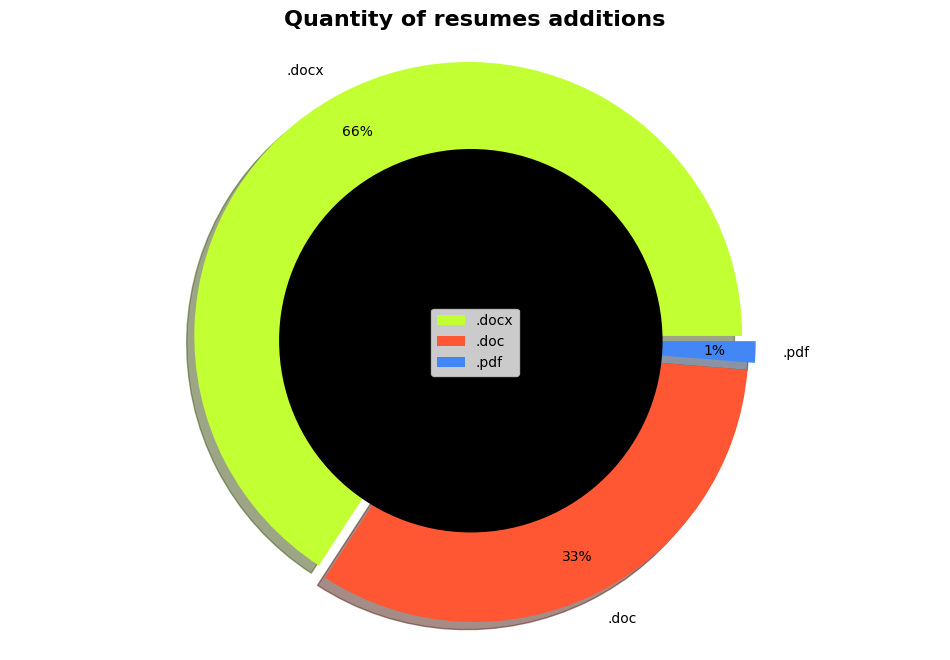

In [6]:
import matplotlib.pyplot as plt

sizes = [file_extension_count['.docx'], file_extension_count['.doc'], file_extension_count['.pdf']]
labels = ['.docx', '.doc', '.pdf']
colors = ['#c2ff33', '#ff5733', '#4287f5']
explode = (0.02, 0.03, 0.04)

plt.figure(figsize=(12, 8), dpi=100)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, pctdistance=0.85, explode=explode)
plt.title('Quantity of resumes additions', fontsize=16, fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='black')
plt.gca().add_artist(centre_circle)

plt.legend(labels, loc='center')
plt.axis('equal')
plt.show()

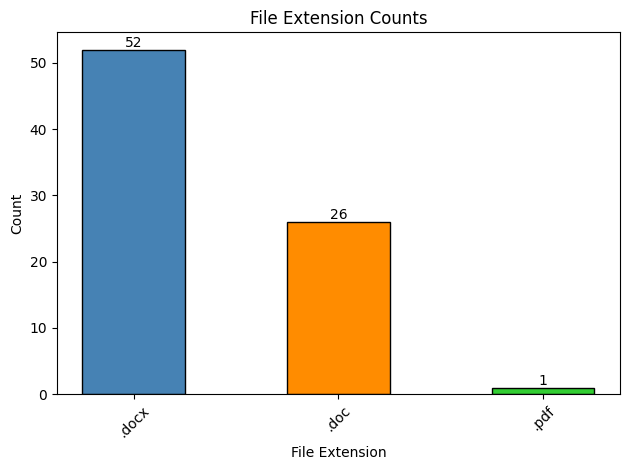

In [7]:
import matplotlib.pyplot as plt

extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]
colors = ['steelblue', 'darkorange', 'limegreen']

plt.bar(extensions, counts, color=colors, width=0.5, edgecolor='black')
plt.xlabel('File Extension')
plt.ylabel('Count')
plt.title('File Extension Counts')
plt.xticks(rotation=45)

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [8]:
import os
import pandas as pd

extract_folder = r'/content/Resumes-Extracted'

file_name = []
profile = []

for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith('.docx') or file.endswith('.doc') or file.endswith('.pdf'):
            parent_folder = os.path.basename(os.path.dirname(root))
            if parent_folder == "Resumes":
                parent_folder = os.path.basename(root)
            profile.append(parent_folder)
            file_name.append(file)

# Create the DataFrame
data = pd.DataFrame()
data['Resume'] = file_name
data['Profile'] = profile

# Print the DataFrame
print(data)


                                               Resume      Profile
0   React JS Developer_KotaniDurgaprasad[3_1] (1)-...  R_developer
1                   React Developer_Naveen sadhu.docx  R_developer
2                 React Developer_Thirupathiamma.docx  R_developer
3   Reactjs Developer_Ranga Gaganam_Musquare Techn...  R_developer
4   Reactjs Developer_Shaik Abdul Sharuk_Musquare ...  R_developer
..                                                ...          ...
74             Peoplesoft Admin_Priyanka Ramadoss.doc   Peoplesoft
75                       Peoplesoft Admin_Murali.docx   Peoplesoft
76              PeopleSoft DBA_Vivekanand Sayana.docx   Peoplesoft
77                 Peoplesoft Finance_Rahul Ahuja.doc   Peoplesoft
78                 Peoplesoft Admin_AnubhavSingh.docx   Peoplesoft

[79 rows x 2 columns]


###**Save the .Csv File**

In [9]:
import pandas as pd
# Specify the file path and name where we need to save the CSV file
file_path = '/content/data.csv'
# Save the DataFrame as a CSV file
data.to_csv(file_path, index=False)

In [10]:
# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path)
# Now work with the DataFrame
print(df)

                                               Resume      Profile
0   React JS Developer_KotaniDurgaprasad[3_1] (1)-...  R_developer
1                   React Developer_Naveen sadhu.docx  R_developer
2                 React Developer_Thirupathiamma.docx  R_developer
3   Reactjs Developer_Ranga Gaganam_Musquare Techn...  R_developer
4   Reactjs Developer_Shaik Abdul Sharuk_Musquare ...  R_developer
..                                                ...          ...
74             Peoplesoft Admin_Priyanka Ramadoss.doc   Peoplesoft
75                       Peoplesoft Admin_Murali.docx   Peoplesoft
76              PeopleSoft DBA_Vivekanand Sayana.docx   Peoplesoft
77                 Peoplesoft Finance_Rahul Ahuja.doc   Peoplesoft
78                 Peoplesoft Admin_AnubhavSingh.docx   Peoplesoft

[79 rows x 2 columns]


In [11]:
df[df.Profile == 'R_developer']

,Resume,Profile
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,R_developer
1,React Developer_Naveen sadhu.docx,R_developer
2,React Developer_Thirupathiamma.docx,R_developer
3,Reactjs Developer_Ranga Gaganam_Musquare Techn...,R_developer
4,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,R_developer
5,React Dev_Krishna Kanth.docx,R_developer
6,Reactjs Developer_Pranish Sonone_Musquare Tech...,R_developer
7,Reactjs Developer_kambala sai surendra_Musquar...,R_developer
8,React Developer_Vinay Reddy.doc,R_developer
9,React Developer_PavasGoswami.doc,R_developer


In [12]:
df[df.Profile == 'Peoplesoft']

,Resume,Profile
59,Peoplesoft FSCM_HariNarayana.docx,Peoplesoft
60,Peoplesoft Admin_Varkala Vikas.docx,Peoplesoft
61,Peoplesoft FSCM_PriyabrataHota.docx,Peoplesoft
62,Peoplesoft Admin_srinivasarao.doc,Peoplesoft
63,Peoplesoft Admin_SirazuddinMohammad.docx,Peoplesoft
64,Peoplesoft FSCM_SUJATHA.docx,Peoplesoft
65,Peoplesoft FSCM_Murali.docx,Peoplesoft
66,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft
67,PeopleSoft DBA_Ganesh Alladi.doc,Peoplesoft
68,Resume_Subha Santosh_Peoplesoft FSCM.docx,Peoplesoft


In [13]:
df[df.Profile == 'Workday']

,Resume,Profile
38,Naresh Babu Cherukuri_Hexaware.doc,Workday
39,ShireeshKumar_Hexaware.doc,Workday
40,J. Sumanth Royal_Hexaware.doc,Workday
41,Venkateswarlu B_Hexaware.doc,Workday
42,RameshP_Hexaware.docx,Workday
43,ChinnaSubbarayuduM_Hexaware.docx,Workday
44,Hari Krishna M_Hexaware.doc,Workday
45,Srikanth-Hexaware.docx,Workday
46,Harikrishna Akula_Hexaware.doc,Workday
47,P V Sai Krishna_ Hexaware.docx,Workday


In [14]:
df[df.Profile == 'SQL_Developer']

,Resume,Profile
24,Priyanka L.doc,SQL_Developer
25,Tatikonda Kiran Kumar.doc,SQL_Developer
26,Neeraj Mishra.docx,SQL_Developer
27,Vinod B.docx,SQL_Developer
28,Anil kumar.docx,SQL_Developer
29,premsai.docx,SQL_Developer
30,RameshNataru[3_4].docx,SQL_Developer
31,Rajupavanakumari[2_10].docx,SQL_Developer
32,kamballapradeep.docx,SQL_Developer
33,Buddha Vamsi.docx,SQL_Developer


##Data Inspection:

###**Data Structure:**

In [15]:
len(df)

79

In [16]:
df.shape

(79, 2)

###**Data Dimension:**

In [17]:
df.ndim

2

###**Data Types:**

In [18]:
df.dtypes

Resume     object
Profile    object
dtype: object

###**Checking Missing Values:**

In [19]:
df.isnull().sum()

Resume     0
Profile    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Resume   79 non-null     object
 1   Profile  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [21]:
df.Profile.value_counts()

R_developer      24
Workday          21
Peoplesoft       20
SQL_Developer    14
Name: Profile, dtype: int64

##**Data Visualization:**

###**Count Plot:**

<Axes: xlabel='count', ylabel='Profile'>

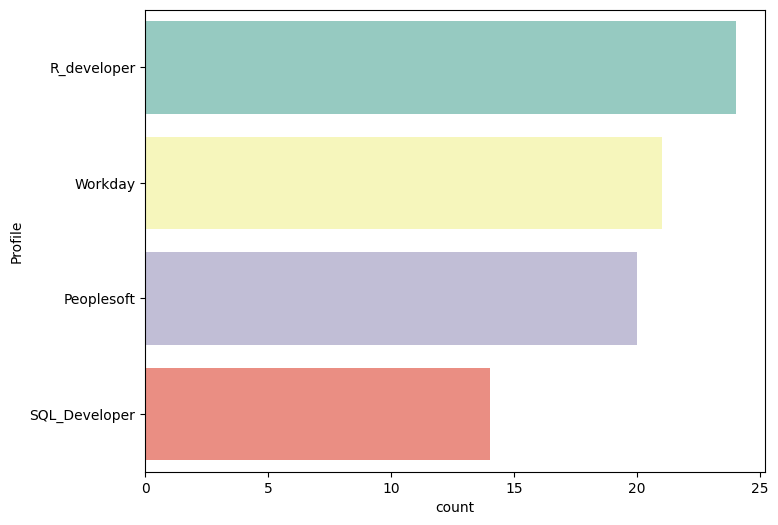

In [22]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Profile" , palette="Set3", data=df, order = df['Profile'].value_counts().index)

###**Histogram:**

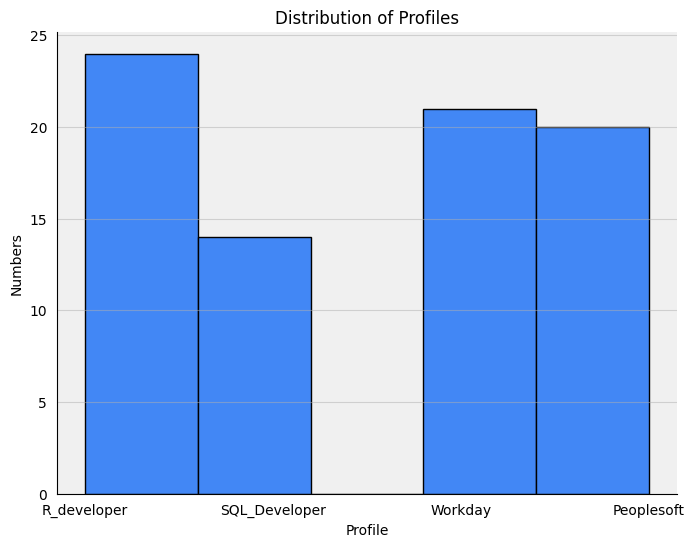

In [23]:
# Create a histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.hist(df['Profile'], bins=5, edgecolor='black', color='#4287f5')  # Customize the color of the bars

# Add labels and title
plt.xlabel('Profile')
plt.ylabel('Numbers')
plt.title('Distribution of Profiles')

# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light background color
plt.gca().set_facecolor('#f0f0f0')

# Adjust tick parameters
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Display the histogram
plt.show()

###**Scatter plot:**

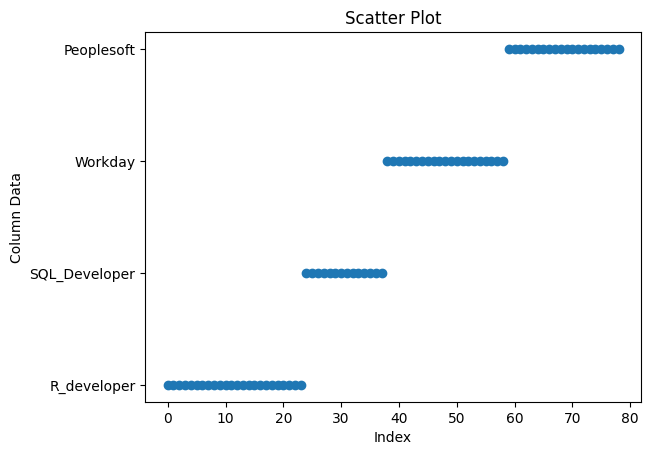

In [24]:
# Create a scatter plot
plt.scatter(df.index, data.Profile)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Column Data')
plt.title('Scatter Plot')

# Display the scatter plot
plt.show()

##**Network Graph**

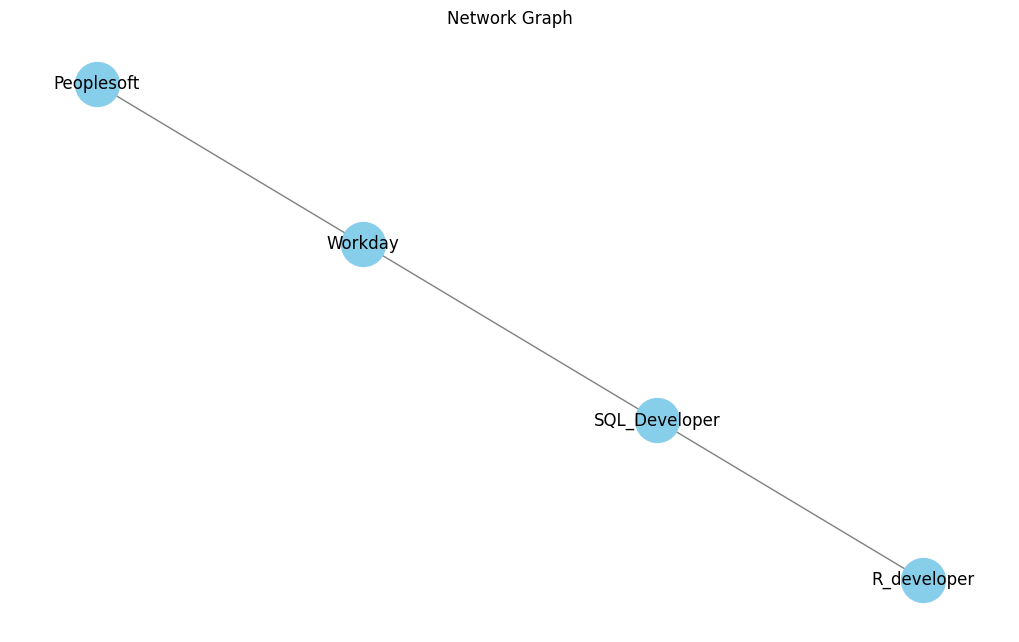

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a column 'column_name'
column_data = df['Profile']

# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = column_data.unique()
G.add_nodes_from(nodes)

# Add edges
edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
G.add_edges_from(edges)

# Draw the network graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.title('Network Graph')
plt.show()

###**Tree Map**

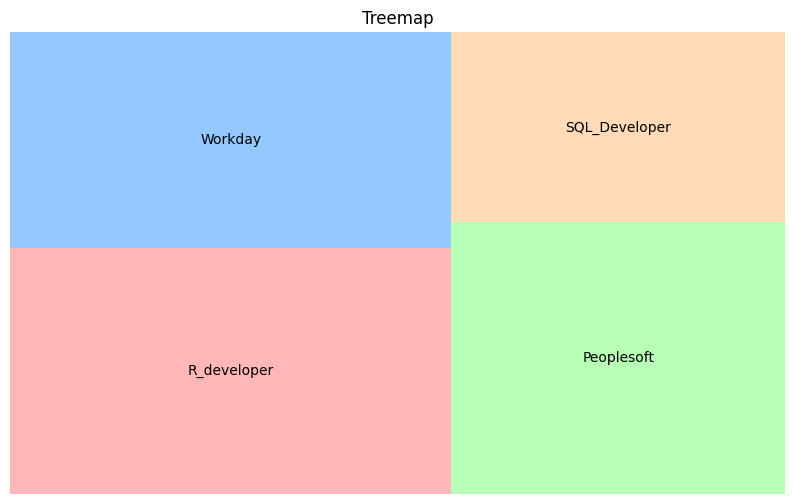

In [26]:
# Assuming you have a DataFrame named 'data' with a column 'column1'
column1 = df['Profile']

# Calculate the proportions of each value in the column
value_counts = column1.value_counts(normalize=True)

# Assign colors to the values
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=value_counts, label=value_counts.index, color=colors, alpha=0.7)

# Add labels and title
plt.axis('off')
plt.title('Treemap')

# Display the treemap
plt.show()

##**Histogram**

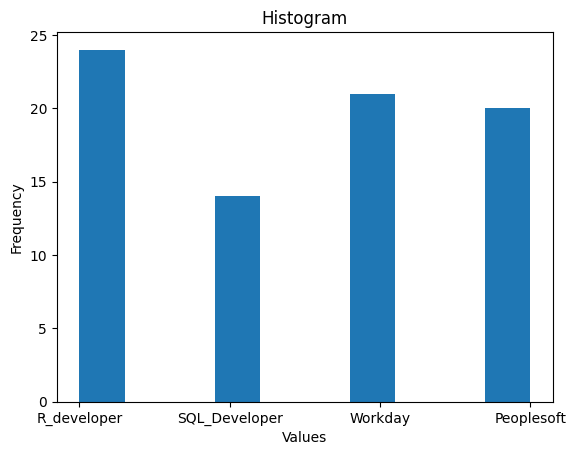

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a column 'column1'
column1 = data['Profile']

# Create a histogram
plt.hist(column1, bins=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()

##**Heat Map**

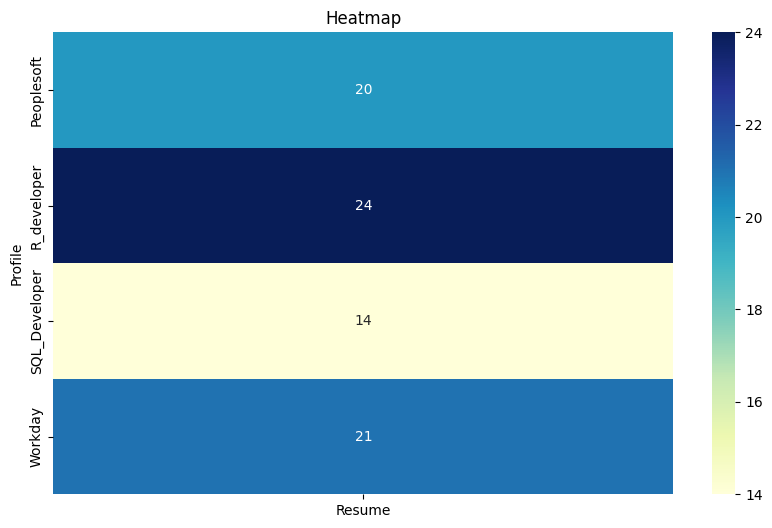

In [28]:
# Assuming you have a DataFrame named 'data' with two columns 'column1' and 'column2'
column1 = 'Profile'  # Replace with the actual column name
column2 = 'Resume'  # Replace with the actual column name

# Create a pivot table with the two columns
pivot_table = pd.pivot_table(df, values=column2, index=column1, aggfunc='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')

# Add title
plt.title('Heatmap')

# Display the heatmap
plt.show()

###**Count Number of Words**

In [29]:
# Count the number of words in the "Resume" column
df['word_count'] = df['Resume'].str.split().apply(len)
# Print the resulting DataFrame
print(df.head(15))

                                               Resume      Profile  word_count
0   React JS Developer_KotaniDurgaprasad[3_1] (1)-...  R_developer           4
1                   React Developer_Naveen sadhu.docx  R_developer           3
2                 React Developer_Thirupathiamma.docx  R_developer           2
3   Reactjs Developer_Ranga Gaganam_Musquare Techn...  R_developer           4
4   Reactjs Developer_Shaik Abdul Sharuk_Musquare ...  R_developer           5
5                        React Dev_Krishna Kanth.docx  R_developer           3
6   Reactjs Developer_Pranish Sonone_Musquare Tech...  R_developer           4
7   Reactjs Developer_kambala sai surendra_Musquar...  R_developer           5
8                     React Developer_Vinay Reddy.doc  R_developer           3
9                    React Developer_PavasGoswami.doc  R_developer           2
10  Reactjs Developer_Prabakaran_Musquare Technolo...  R_developer           3
11  Internship_Susovan Bag_Musquare Technologies.doc

###**Count Number of Characters**

In [30]:
# Count the number of characters in the "Resume" column
df['char_count'] = df['Resume'].str.len()
# Print the "Resume" and "char_count" columns
print(df[['Resume', 'char_count']])

                                               Resume  char_count
0   React JS Developer_KotaniDurgaprasad[3_1] (1)-...          60
1                   React Developer_Naveen sadhu.docx          33
2                 React Developer_Thirupathiamma.docx          35
3   Reactjs Developer_Ranga Gaganam_Musquare Techn...          58
4   Reactjs Developer_Shaik Abdul Sharuk_Musquare ...          63
..                                                ...         ...
74             Peoplesoft Admin_Priyanka Ramadoss.doc          38
75                       Peoplesoft Admin_Murali.docx          28
76              PeopleSoft DBA_Vivekanand Sayana.docx          37
77                 Peoplesoft Finance_Rahul Ahuja.doc          34
78                 Peoplesoft Admin_AnubhavSingh.docx          34

[79 rows x 2 columns]


###**Count Numbers**

In [31]:
def count_numbers(text):
    return sum(char.isdigit() for char in str(text))
# Apply the counting function to the "Resume" column
df['num_numbers'] = df['Resume'].apply(count_numbers)
print(df[['Resume', 'num_numbers']].head(32))

                                               Resume  num_numbers
0   React JS Developer_KotaniDurgaprasad[3_1] (1)-...            3
1                   React Developer_Naveen sadhu.docx            0
2                 React Developer_Thirupathiamma.docx            0
3   Reactjs Developer_Ranga Gaganam_Musquare Techn...            0
4   Reactjs Developer_Shaik Abdul Sharuk_Musquare ...            0
5                        React Dev_Krishna Kanth.docx            0
6   Reactjs Developer_Pranish Sonone_Musquare Tech...            0
7   Reactjs Developer_kambala sai surendra_Musquar...            0
8                     React Developer_Vinay Reddy.doc            0
9                    React Developer_PavasGoswami.doc            0
10  Reactjs Developer_Prabakaran_Musquare Technolo...            0
11  Internship_Susovan Bag_Musquare Technologies.docx            0
12       React Developer_Sarala Madasu-converted.docx            0
13                    Reactjs Developer_M Lokesh.docx         

In [32]:
df.head(20)

,Resume,Profile,word_count,char_count,num_numbers
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,R_developer,4,60,3
1,React Developer_Naveen sadhu.docx,R_developer,3,33,0
2,React Developer_Thirupathiamma.docx,R_developer,2,35,0
3,Reactjs Developer_Ranga Gaganam_Musquare Techn...,R_developer,4,58,0
4,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,R_developer,5,63,0
5,React Dev_Krishna Kanth.docx,R_developer,3,28,0
6,Reactjs Developer_Pranish Sonone_Musquare Tech...,R_developer,4,59,0
7,Reactjs Developer_kambala sai surendra_Musquar...,R_developer,5,65,0
8,React Developer_Vinay Reddy.doc,R_developer,3,31,0
9,React Developer_PavasGoswami.doc,R_developer,2,32,0


In [33]:
df = df.drop(["word_count", "char_count", "num_numbers"], axis=1)

In [34]:
df.head(19)

,Resume,Profile
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,R_developer
1,React Developer_Naveen sadhu.docx,R_developer
2,React Developer_Thirupathiamma.docx,R_developer
3,Reactjs Developer_Ranga Gaganam_Musquare Techn...,R_developer
4,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,R_developer
5,React Dev_Krishna Kanth.docx,R_developer
6,Reactjs Developer_Pranish Sonone_Musquare Tech...,R_developer
7,Reactjs Developer_kambala sai surendra_Musquar...,R_developer
8,React Developer_Vinay Reddy.doc,R_developer
9,React Developer_PavasGoswami.doc,R_developer


###**Cleaning & Preprocessing of data**

In [35]:
import re
def remove_numbers(text):
    # Remove special characters,digits & Numbers
    text = re.sub(r"[^a-zA-Z\s]_()", " ", text)
    # Remove numbers using regular expression
    text = re.sub(r'\d+', '', text)
    return text

df['Resume'] = df['Resume'].apply(remove_numbers)
df.head(12)

,Resume,Profile
0,React JS Developer_KotaniDurgaprasad[ ] ()-con...,R_developer
1,React Developer_Naveen sadhu.docx,R_developer
2,React Developer_Thirupathiamma.docx,R_developer
3,Reactjs Developer_Ranga Gaganam_Musquare Techn...,R_developer
4,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,R_developer
5,React Dev_Krishna Kanth.docx,R_developer
6,Reactjs Developer_Pranish Sonone_Musquare Tech...,R_developer
7,Reactjs Developer_kambala sai surendra_Musquar...,R_developer
8,React Developer_Vinay Reddy.doc,R_developer
9,React Developer_PavasGoswami.doc,R_developer


In [36]:
resume_paragraph = '\n'.join(df['Resume'])
print(resume_paragraph)

React JS Developer_KotaniDurgaprasad[ ] ()-converted.docx
React Developer_Naveen sadhu.docx
React Developer_Thirupathiamma.docx
Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx
Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx
React Dev_Krishna Kanth.docx
Reactjs Developer_Pranish Sonone_Musquare Technologies.docx
Reactjs Developer_kambala sai surendra_Musquare Technologies.docx
React Developer_Vinay Reddy.doc
React Developer_PavasGoswami.doc
Reactjs Developer_Prabakaran_Musquare Technologies.pdf
Internship_Susovan Bag_Musquare Technologies.docx
React Developer_Sarala Madasu-converted.docx
Reactjs Developer_M Lokesh.docx
React Developer_Pragnya.docx
React Developer_Kamalakar Reddy.docx
Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx
React Dev_Krishna Kanth_Musquare Technologies.docx
Internship_Ravali_Musquare Technologies ().docx
React Developer_Deepakreddy.docx
React Developer_Haripriya.docx
React JS Developer_AnjaniPriyadarshini.doc
React JS Develop

In [37]:
import textwrap
#To display the paragraph with line breaks in a readable format
joined_text = ' '.join(df['Resume'].tolist())
paragraph = "\n\n".join([line.strip() for line in joined_text.split("\n") if line.strip()])

# Wrap the paragraph with a specific width
wrapped_paragraph = textwrap.fill(paragraph, width=80)

# Print the wrapped paragraph
print(wrapped_paragraph)

React JS Developer_KotaniDurgaprasad[ ] ()-converted.docx React Developer_Naveen
sadhu.docx React Developer_Thirupathiamma.docx Reactjs Developer_Ranga
Gaganam_Musquare Technologies.docx Reactjs Developer_Shaik Abdul Sharuk_Musquare
Technologies.docx React Dev_Krishna Kanth.docx Reactjs Developer_Pranish
Sonone_Musquare Technologies.docx Reactjs Developer_kambala sai
surendra_Musquare Technologies.docx React Developer_Vinay Reddy.doc React
Developer_PavasGoswami.doc Reactjs Developer_Prabakaran_Musquare
Technologies.pdf Internship_Susovan Bag_Musquare Technologies.docx React
Developer_Sarala Madasu-converted.docx Reactjs Developer_M Lokesh.docx React
Developer_Pragnya.docx React Developer_Kamalakar Reddy.docx Reactjs Developer_M
Lokesh Babu_Musquare Technologies.docx React Dev_Krishna Kanth_Musquare
Technologies.docx Internship_Ravali_Musquare Technologies ().docx React
Developer_Deepakreddy.docx React Developer_Haripriya.docx React JS
Developer_AnjaniPriyadarshini.doc React JS Develop

In [38]:
#Punctuation
no_punc_text = wrapped_paragraph.translate(str.maketrans("", "", string.punctuation))
no_punc_text

'React JS DeveloperKotaniDurgaprasad  converteddocx React DeveloperNaveen\nsadhudocx React DeveloperThirupathiammadocx Reactjs DeveloperRanga\nGaganamMusquare Technologiesdocx Reactjs DeveloperShaik Abdul SharukMusquare\nTechnologiesdocx React DevKrishna Kanthdocx Reactjs DeveloperPranish\nSononeMusquare Technologiesdocx Reactjs Developerkambala sai\nsurendraMusquare Technologiesdocx React DeveloperVinay Reddydoc React\nDeveloperPavasGoswamidoc Reactjs DeveloperPrabakaranMusquare\nTechnologiespdf InternshipSusovan BagMusquare Technologiesdocx React\nDeveloperSarala Madasuconverteddocx Reactjs DeveloperM Lokeshdocx React\nDeveloperPragnyadocx React DeveloperKamalakar Reddydocx Reactjs DeveloperM\nLokesh BabuMusquare Technologiesdocx React DevKrishna KanthMusquare\nTechnologiesdocx InternshipRavaliMusquare Technologies docx React\nDeveloperDeepakreddydocx React DeveloperHaripriyadocx React JS\nDeveloperAnjaniPriyadarshinidoc React JS DeveloperVenkatalakshmi\nconverteddocx Reactjs Develop

In [39]:
# Normalize the data and convert to lowercase
lower_words = [word.lower() for word in no_punc_text.split()]
print(lower_words[0:35])

['react', 'js', 'developerkotanidurgaprasad', 'converteddocx', 'react', 'developernaveen', 'sadhudocx', 'react', 'developerthirupathiammadocx', 'reactjs', 'developerranga', 'gaganammusquare', 'technologiesdocx', 'reactjs', 'developershaik', 'abdul', 'sharukmusquare', 'technologiesdocx', 'react', 'devkrishna', 'kanthdocx', 'reactjs', 'developerpranish', 'sononemusquare', 'technologiesdocx', 'reactjs', 'developerkambala', 'sai', 'surendramusquare', 'technologiesdocx', 'react', 'developervinay', 'reddydoc', 'react', 'developerpavasgoswamidoc']


In [40]:
len(no_punc_text)

2456

## **Feature Extraction**

###**CountVectorizer**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Resume'])

In [42]:
print(vectorizer.vocabulary_)

{'react': 109, 'js': 73, 'developer_kotanidurgaprasad': 38, 'converted': 29, 'docx': 53, 'developer_naveen': 41, 'sadhu': 115, 'developer_thirupathiamma': 49, 'reactjs': 110, 'developer_ranga': 46, 'gaganam_musquare': 64, 'technologies': 129, 'developer_shaik': 48, 'abdul': 2, 'sharuk_musquare': 119, 'dev_krishna': 32, 'kanth': 76, 'developer_pranish': 45, 'sonone_musquare': 121, 'developer_kambala': 37, 'sai': 116, 'surendra_musquare': 126, 'developer_vinay': 51, 'reddy': 111, 'doc': 52, 'developer_pavasgoswami': 42, 'developer_prabakaran_musquare': 43, 'pdf': 95, 'internship_susovan': 72, 'bag_musquare': 23, 'developer_sarala': 47, 'madasu': 87, 'developer_m': 39, 'lokesh': 85, 'developer_pragnya': 44, 'developer_kamalakar': 36, 'babu_musquare': 22, 'kanth_musquare': 77, 'internship_ravali_musquare': 71, 'developer_deepakreddy': 34, 'developer_haripriya': 35, 'developer_anjanipriyadarshini': 33, 'developer_venkatalakshmi': 50, 'developer_md': 40, 'khizaruddin': 78, 'rauf': 107, '_mus

In [43]:
print(vectorizer.get_feature_names_out()[50:150])
print(X.toarray()[50:150])

['developer_venkatalakshmi' 'developer_vinay' 'doc' 'docx' 'finance_arun'
 'finance_pritam' 'finance_rahul' 'fscm' 'fscm_harinarayana' 'fscm_murali'
 'fscm_priyabratahota' 'fscm_r' 'fscm_sujatha' 'g_' 'gaganam_musquare'
 'gopi' 'hari' 'harikrishna' 'hexaware' 'hima' 'himaja'
 'internship_ravali_musquare' 'internship_susovan' 'js'
 'jyotiverma_heaware' 'kamballapradeep' 'kanth' 'kanth_musquare'
 'khizaruddin' 'kiran' 'krishna' 'krishna_' 'krishna_hexaware' 'kumar'
 'kumar_hexaware' 'lokesh' 'm_hexaware' 'madasu' 'madeeswar'
 'mendu_hexaware' 'mishra' 'mooraboyinaguravaiah_hexaware' 'naresh'
 'nazeer' 'neeraj' 'pdf' 'peoplesoft' 'premsai' 'priyanka' 'psyamkumar'
 'punugoti' 'rahulm_hexaware' 'rajupavanakumari' 'ramadoss' 'ramalakshmi'
 'rameshnataru' 'rameshp_hexaware' 'rauf' 'rayudu' 'react' 'reactjs'
 'reddy' 'resume_subha' 'royal_hexaware' 's_hexaware' 'sadhu' 'sai'
 'santosh_peoplesoft' 'sayana' 'sharuk_musquare' 'shireeshkumar_hexaware'
 'sonone_musquare' 'sri' 'srikanth' 'sskumar_h

In [44]:
print(X.toarray().shape)

(79, 136)


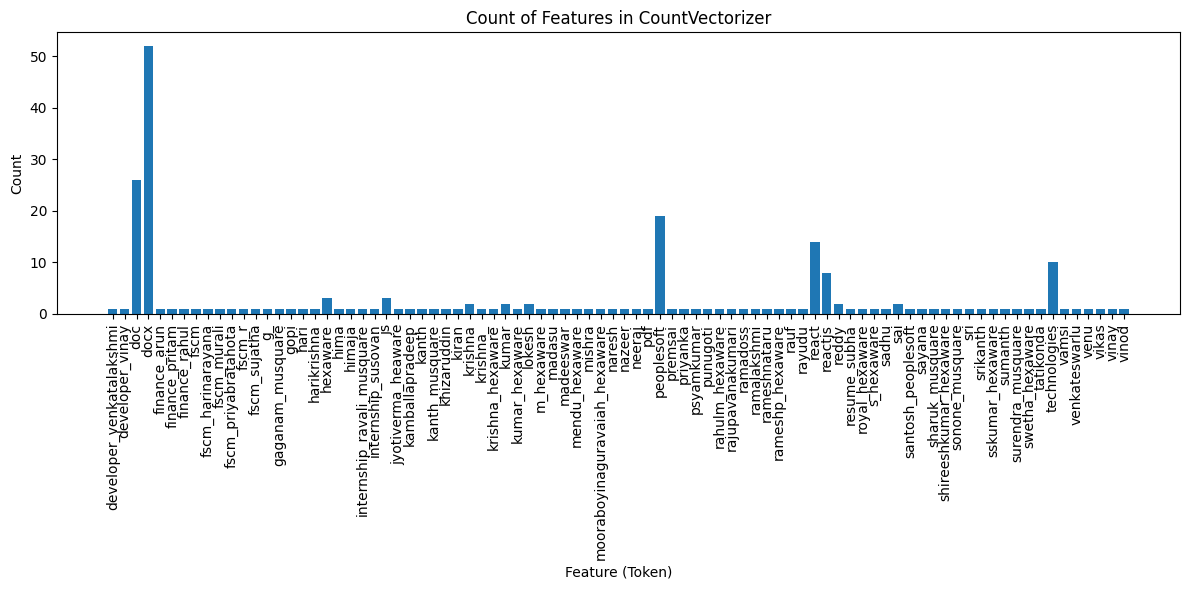

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Instantiate CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Resume'])

# Get the feature names (tokens) and their count
feature_names = vectorizer.get_feature_names_out()[50:150]
feature_counts = X.toarray()[:, 50:150].sum(axis=0)

# Create a bar plot for feature counts
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_counts)
plt.xticks(rotation=90)
plt.xlabel('Feature (Token)')
plt.ylabel('Count')
plt.title('Count of Features in CountVectorizer')
plt.tight_layout()
plt.show()


## **TFidf vectorizer**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 110)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df['Resume'])
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['_musquare' 'converted' 'converted docx' 'dev_krishna' 'developer_m'
 'developer_m lokesh' 'doc' 'docx' 'hexaware' 'hexaware docx' 'js'
 'krishna' 'kumar' 'kumar doc' 'kumar docx' 'kumar_hexaware'
 'kumar_hexaware docx' 'lokesh' 'lokesh babu_musquare'
 'lokesh babu_musquare technologies' 'lokesh docx' 'm_hexaware'
 'm_hexaware doc' 'madasu' 'madasu converted' 'madasu converted docx'
 'madeeswar' 'madeeswar a_hexaware' 'madeeswar a_hexaware doc'
 'mendu_hexaware' 'mendu_hexaware doc' 'mishra' 'mishra docx'
 'mooraboyinaguravaiah_hexaware' 'mooraboyinaguravaiah_hexaware docx'
 'naresh' 'naresh babu' 'naresh babu cherukuri_hexaware' 'nazeer'
 'nazeer basha' 'neeraj mishra docx' 'pdf' 'peoplesoft'
 'peoplesoft admin_anubhavsingh' 'peoplesoft admin_anubhavsingh docx'
 'peoplesoft admin_g' 'peoplesoft admin_g ananda'
 'peoplesoft admin_gangareddy' 'peoplesoft admin_gangareddy doc'
 'peoplesoft admin_murali' 'peoplesoft admin_murali docx'
 'peoplesoft admin_priyanka' 'peoplesoft admin_priyan

###**Named Entity Recognition (NER)**

In [47]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Apply NER on the resume_paragraph
doc = nlp(resume_paragraph)

# Iterate over the entities and print them
for entity in doc.ents:
    print(entity.text, entity.label_)

Developer_kambala PERSON
Reddy.doc ORG
Technologies.pdf ORG
Developer_M Lokesh.docx
React PERSON
Developer_M Lokesh PERSON
React JS ORG
Musquare PERSON
Tatikonda Kiran Kumar.doc PERSON
Neeraj ORG
Vinod ORG
Anil kumar.docx PERSON
Rajupavanakumari PERSON
Babu PERSON
Venkateswarlu B_Hexaware.doc
RameshP_Hexaware.docx ORG
Hari Krishna M_Hexaware.doc PERSON
Srikanth-Hexaware.docx ORG
Harikrishna LOC
Hexaware.docx
 PERSON
Punugoti GPE
Sri Krishna PERSON
Jyotiverma_Heaware.docx
Hima Mendu_Hexaware.doc
Madeeswar A_Hexaware.doc ORG
Himaja G_(Hexaware).docx PERSON
Vinay GPE
Peoplesoft ORG
FSCM_HariNarayana.docx ORG
Peoplesoft ORG
Peoplesoft ORG
Peoplesoft PERSON
Peoplesoft PERSON
Peoplesoft PERSON
FSCM_SUJATHA.docx
 PERSON
Peoplesoft ORG
Peoplesoft ORG
Ananda Rayudu.doc PERSON
PeopleSoft ORG
Alladi.doc ORG
Peoplesoft ORG
Peoplesoft ORG
Akkala.doc ORG
Peoplesoft ORG
FSCM_R NORP
Ahmed.doc ORG
Peoplesoft ORG
Biswas.doc ORG
Peoplesoft Finance_Arun ORG
Peoplesoft ORG
Ramadoss.doc ORG
Peoplesoft PERSO

In [48]:
word_freq = {}
for word in resume_paragraph.split():
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
for word, freq in sorted_word_freq:
    print(word, freq)

Peoplesoft 17
React 14
Reactjs 8
Technologies.docx 8
].docx 4
JS 3
()-converted.docx 2
Dev_Krishna 2
Developer_M 2
Krishna 2
PeopleSoft 2
Developer_KotaniDurgaprasad[ 1
] 1
Developer_Naveen 1
sadhu.docx 1
Developer_Thirupathiamma.docx 1
Developer_Ranga 1
Gaganam_Musquare 1
Developer_Shaik 1
Abdul 1
Sharuk_Musquare 1
Kanth.docx 1
Developer_Pranish 1
Sonone_Musquare 1
Developer_kambala 1
sai 1
surendra_Musquare 1
Developer_Vinay 1
Reddy.doc 1
Developer_PavasGoswami.doc 1
Developer_Prabakaran_Musquare 1
Technologies.pdf 1
Internship_Susovan 1
Bag_Musquare 1
Developer_Sarala 1
Madasu-converted.docx 1
Lokesh.docx 1
Developer_Pragnya.docx 1
Developer_Kamalakar 1
Reddy.docx 1
Lokesh 1
Babu_Musquare 1
Kanth_Musquare 1
Internship_Ravali_Musquare 1
Technologies 1
().docx 1
Developer_Deepakreddy.docx 1
Developer_Haripriya.docx 1
Developer_AnjaniPriyadarshini.doc 1
Developer_Venkatalakshmi 1
Developer_MD 1
Khizaruddin 1
Rauf 1
_Musquare 1
Priyanka 1
L.doc 1
Tatikonda 1
Kiran 1
Kumar.doc 1
Neeraj 1

###**Bar-Plot For Top 15 Words**

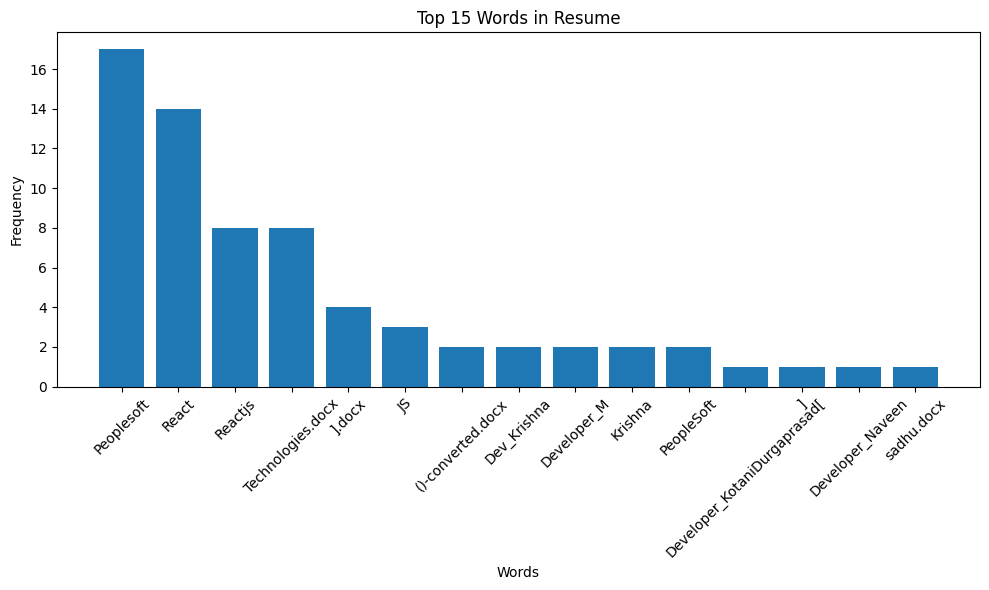

In [49]:
top_words = sorted_word_freq[:15]  # Select the top 20 words
words, frequencies = zip(*top_words)  # Unpack the word-frequency pairs
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(words, frequencies)  # Create the bar plot
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in Resume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot

###**Word-Cloud For top 27 Words**

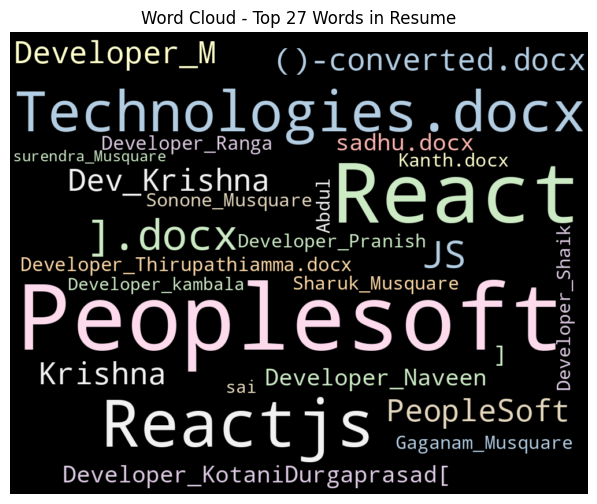

In [50]:
top_words = dict(sorted_word_freq[:27])  # Select the top 27 words as a dictionary
wordcloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                      colormap="Pastel1", collocations=False).generate_from_frequencies(top_words)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud - Top 27 Words in Resume')
plt.show()  # Display the word cloud

##**Model Selection**

###**Chi-Square Test**

**Null Hypothesis (H0):** There is no significant association between the content of the resume and the job profile.

**Alternative Hypothesis (H1):** There is a significant association between the content of the resume and the job profile.

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is called DF
resume_column = df["Resume"]
profile_column = df["Profile"]

# Create a contingency table
contingency_table = pd.crosstab(resume_column, profile_column)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 236.99999999999997
p-value: 0.4329466780583608


**Alternative hypothesis suggests that there is a meaningful relationship between the content of the resume and the job profile**

###**Mutual information**

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

# Assuming your DataFrame is called DF
resume_column = df["Resume"]
profile_column = df["Profile"]

# Create and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1, 3), max_features=110)
tfidf_matrix = vectorizer.fit_transform(resume_column)

# Calculate the mutual information
mutual_info_scores = mutual_info_classif(tfidf_matrix, profile_column)

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display the results
results = pd.DataFrame({"Feature": feature_names, "Mutual Information Score": mutual_info_scores})

# Print the results
print(results)


                        Feature  Mutual Information Score
0                     _musquare                  0.015268
1                     converted                  0.046991
2                converted docx                  0.046991
3                   dev_krishna                  0.030924
4                   developer_m                  0.030924
..                          ...                       ...
105  reactjs developer_m lokesh                  0.030924
106                       reddy                  0.030924
107                         sai                  0.032103
108                technologies                  0.173501
109           technologies docx                  0.153660

[110 rows x 2 columns]


**1)0.015268, suggesting it has relatively low information content regarding the "Profile" column**

**2)0.046991, indicating they provide slightly more information about the job profiles**

**3)0.173501, indicating it is a significant feature that carries valuable information for classifying the job profiles based on the resumes**

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, profile_column, test_size=0.2, random_state=44)
X_train.shape, X_test.shape

((63, 110), (16, 110))

###**Naive Bayes**

In [54]:
# Create and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict the job profiles for the test set
ny_pred = naive_bayes.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ny_pred))


               precision    recall  f1-score   support

   Peoplesoft       0.50      1.00      0.67         4
  R_developer       0.29      1.00      0.44         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       1.00      0.14      0.25         7

     accuracy                           0.44        16
    macro avg       0.45      0.54      0.34        16
 weighted avg       0.60      0.44      0.33        16



###**Support Vector Machines (SVM)**

In [55]:
# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the job profiles for the test set
svy_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, svy_pred))

               precision    recall  f1-score   support

   Peoplesoft       0.67      1.00      0.80         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       0.75      0.86      0.80         7

     accuracy                           0.75        16
    macro avg       0.60      0.71      0.65        16
 weighted avg       0.62      0.75      0.68        16



###**Logistic Regression**

In [56]:
# Create and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the job profiles for the test set
ly_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ly_pred))

               precision    recall  f1-score   support

   Peoplesoft       0.80      1.00      0.89         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       0.67      0.86      0.75         7

     accuracy                           0.75        16
    macro avg       0.62      0.71      0.66        16
 weighted avg       0.62      0.75      0.68        16



###**Random Forest**

In [57]:
# Create and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict the job profiles for the test set
ry_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ry_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.50      0.33      0.40         3
      Workday       0.75      0.86      0.80         7

     accuracy                           0.81        16
    macro avg       0.81      0.80      0.80        16
 weighted avg       0.80      0.81      0.80        16



###**Gradient Boosting Model**

In [58]:
# Create and train the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Predict the job profiles for the test set
gby_pred = gradient_boosting.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, gby_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       0.70      1.00      0.82         7

     accuracy                           0.81        16
    macro avg       0.68      0.75      0.71        16
 weighted avg       0.68      0.81      0.74        16



###**AdaBoost model**

In [59]:
# Create and train the AdaBoost classifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

# Predict the job profiles for the test set
ady_pred = adaboost.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ady_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
  R_developer       0.20      1.00      0.33         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       0.50      0.14      0.22         7

     accuracy                           0.44        16
    macro avg       0.42      0.54      0.39        16
 weighted avg       0.49      0.44      0.39        16



###**Bagging Classifier**

In [60]:
# Create and train the Bagging classifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

# Predict the job profiles for the test set
by_pred = bagging.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, by_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.00      0.00      0.00         3
      Workday       0.70      1.00      0.82         7

     accuracy                           0.81        16
    macro avg       0.68      0.75      0.71        16
 weighted avg       0.68      0.81      0.74        16



###**Decision Tree Classifier**

In [61]:
# Create and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict the job profiles for the test set
dy_pred = decision_tree.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, dy_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
  R_developer       1.00      1.00      1.00         2
SQL_Developer       0.67      0.67      0.67         3
      Workday       0.86      0.86      0.86         7

     accuracy                           0.88        16
    macro avg       0.88      0.88      0.88        16
 weighted avg       0.88      0.88      0.88        16



###**KNN Classifier**

In [62]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict the job profiles for the test set
ky_pred = knn.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ky_pred))

               precision    recall  f1-score   support

   Peoplesoft       0.00      0.00      0.00         4
  R_developer       0.25      1.00      0.40         2
SQL_Developer       0.29      0.67      0.40         3
      Workday       1.00      0.14      0.25         7

     accuracy                           0.31        16
    macro avg       0.38      0.45      0.26        16
 weighted avg       0.52      0.31      0.23        16



In [63]:
# Initialize lists to store evaluation metrics
classifiers = ["Naive Bayes", "Support Vector Machine", "Logistic Regression", "Random Forest", "Gradient Boosting", "AdaBoost", "Bagging Classifier", "Decision Tree", "KNN Classifier"]
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate each classifier and store the evaluation metrics
for classifier, y_pred in zip(classifiers, [ny_pred,svy_pred,ly_pred,ry_pred,gby_pred,ady_pred,by_pred,dy_pred,ky_pred]):
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'] * 100)
    recall_scores.append(report['weighted avg']['recall'] * 100)
    f1_scores.append(report['weighted avg']['f1-score'] * 100)

# Create a DataFrame to store the evaluation metrics
evaluation_table = pd.DataFrame({
    "Classifier": classifiers,
    "Precision(%)": precision_scores,
    "Recall(%)": recall_scores,
    "F1-Score(%)": f1_scores
})

# Display the evaluation table
print(evaluation_table)


               Classifier  Precision(%)  Recall(%)  F1-Score(%)
0             Naive Bayes     59.821429      43.75    33.159722
1  Support Vector Machine     61.979167      75.00    67.500000
2     Logistic Regression     61.666667      75.00    67.534722
3           Random Forest     79.687500      81.25    80.000000
4       Gradient Boosting     68.125000      81.25    73.529412
5                AdaBoost     49.375000      43.75    38.888889
6      Bagging Classifier     68.125000      81.25    73.529412
7           Decision Tree     87.500000      87.50    87.500000
8          KNN Classifier     52.232143      31.25    23.437500


###**Model Visualization**

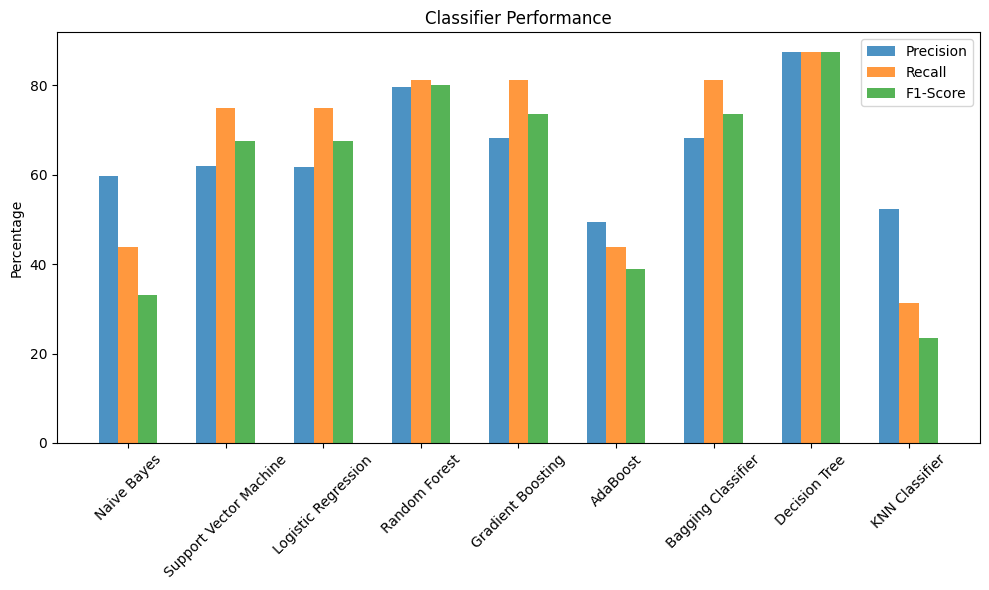

In [64]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
pos = list(range(len(evaluation_table)))
width = 0.2

# Plot the precision, recall, and F1-score as grouped bars
plt.bar(pos, evaluation_table['Precision(%)'], width, alpha=0.8, label='Precision')
plt.bar([p + width for p in pos], evaluation_table['Recall(%)'], width, alpha=0.8, label='Recall')
plt.bar([p + 2 * width for p in pos], evaluation_table['F1-Score(%)'], width, alpha=0.8, label='F1-Score')

# Set the x-axis labels and tick positions
plt.xticks([p + width for p in pos], evaluation_table['Classifier'], rotation=45)

# Set the y-axis label
plt.ylabel('Percentage')

# Set the chart title
plt.title('Classifier Performance')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

##**Model Evaluation**

####**Training and Testing accuracy for Models:**

####**Naive Bayes:**

In [66]:
# Calculate training accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = naive_bayes.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.873015873015873
Testing Accuracy: 0.4375


####**Support Vector Machine:**

In [74]:
# Calculate training accuracy
train_accuracy = svm.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = svm.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.75


####**Logistic Regression:**

In [68]:
# Calculate training accuracy
train_accuracy = logistic_regression.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = logistic_regression.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.75


####**Random Forest:**

In [69]:
# Calculate training accuracy
train_accuracy = random_forest.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = random_forest.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.8125


####**Gradient Boosting:**

In [70]:
# Calculate training accuracy
train_accuracy = gradient_boosting.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = gradient_boosting.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.8125


####**AdaBoost:**     

In [72]:
# Calculate training accuracy
train_accuracy = adaboost.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = adaboost.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6349206349206349
Testing Accuracy: 0.4375


####**Bagging Classifier:**

In [73]:
# Calculate training accuracy
train_accuracy = bagging.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = bagging.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.8125


####**Decision Tree:**

In [75]:
# Calculate training accuracy
train_accuracy = decision_tree.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = decision_tree.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9365079365079365
Testing Accuracy: 0.875


####**KNN Classifier:**

In [76]:
# Calculate training accuracy
train_accuracy = knn.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = knn.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7619047619047619
Testing Accuracy: 0.3125


####**Classifier Evaluation Results**

In [110]:
import pandas as pd

# Create a list of classifiers and their names
classifiers = [naive_bayes, svm, logistic_regression, random_forest, gradient_boosting, adaboost, bagging, decision_tree, knn]
classifier_names = ['Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Decision Tree', 'KNN Classifier']

# Create empty lists to store the accuracy values and evaluation metrics
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate training and testing accuracies for each classifier
for classifier in classifiers:
    # Calculate training accuracy
    train_accuracy = classifier.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    test_accuracy = classifier.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

    # Calculate classification report for evaluation metrics
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'] * 100)
    recall_scores.append(report['weighted avg']['recall'] * 100)
    f1_scores.append(report['weighted avg']['f1-score'] * 100)

# Create a dictionary to store the evaluation values
data = {
    "Models": classifier_names,
    "Train": train_accuracies,
    "Test": test_accuracies,
    "Precision(%)": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
}
# Create the table using pandas DataFrame
evaluation_table = pd.DataFrame(data)
print(evaluation_table)


                   Models     Train    Test  Precision(%)  Recall   F1-Score
0             Naive Bayes  0.873016  0.4375     59.821429   43.75  33.159722
1  Support Vector Machine  0.936508  0.7500     61.979167   75.00  67.500000
2     Logistic Regression  0.936508  0.7500     61.666667   75.00  67.534722
3           Random Forest  0.936508  0.8125     79.687500   81.25  80.000000
4       Gradient Boosting  0.936508  0.8125     68.125000   81.25  73.529412
5                AdaBoost  0.634921  0.4375     49.375000   43.75  38.888889
6                 Bagging  0.936508  0.8125     68.125000   81.25  73.529412
7           Decision Tree  0.936508  0.8750     87.500000   87.50  87.500000
8          KNN Classifier  0.761905  0.3125     52.232143   31.25  23.437500


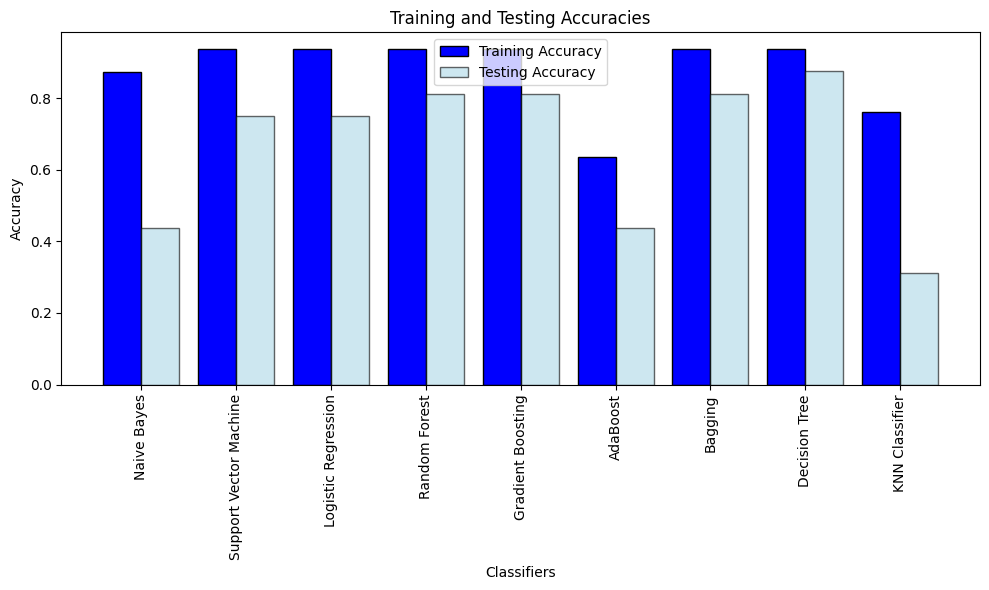

In [109]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Decision Tree', 'KNN Classifier']
train_accuracy = [0.873016, 0.936508, 0.936508, 0.936508, 0.936508, 0.634921, 0.936508, 0.936508, 0.761905]
test_accuracy = [0.4375, 0.75, 0.75, 0.8125, 0.8125, 0.4375, 0.8125, 0.875, 0.3125]

bar_width = 0.4
r1 = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracy, color='blue', width=bar_width, edgecolor='black', label='Training Accuracy')
plt.bar(r1 + bar_width, test_accuracy, color='lightblue', width=bar_width, edgecolor='black', alpha=0.6, label='Testing Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.xticks([r + bar_width/2 for r in r1], classifiers, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
